In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (15,10)

# Problem 1

## Part A
**Our goal: Filtering out the bad data from the good data.**

1)
We are given some data to simulate, so we will plot out the data give by the sample and add the coordinate axes. 
We can see that the data is mostly good with a few bad data.

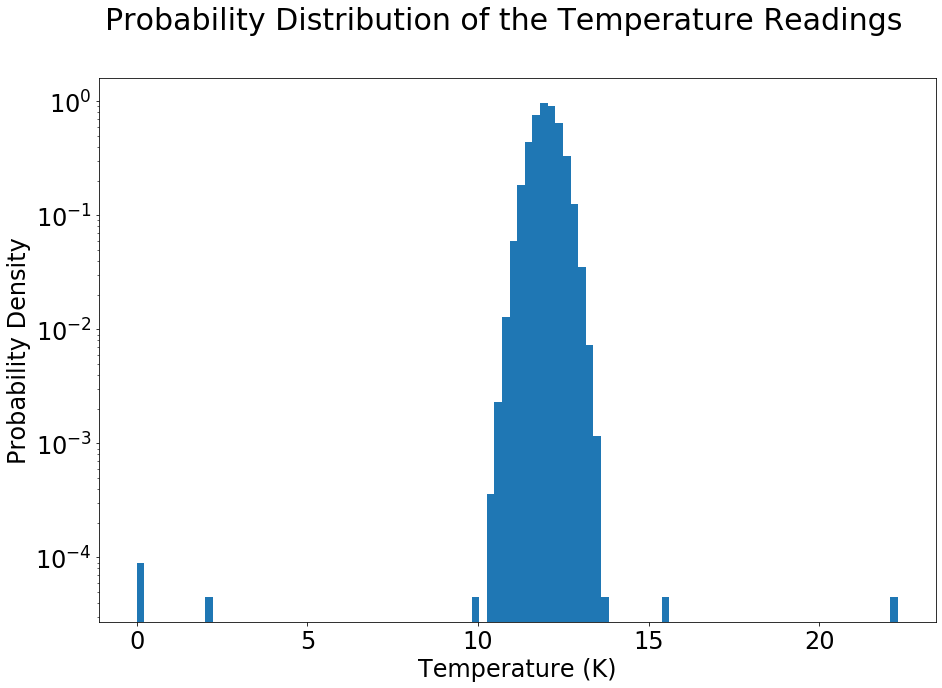

In [153]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.suptitle('Probability Distribution of the Temperature Readings', fontsize=30)
plt.xlabel('Temperature (K)', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.show()

2)To filter bad data from the good data, we are asking this question: 

If there's no error, and the error-free data has an Gaussian distribution, what's the probability that the background data produces an signal that's equally or more error-like for what we observed?

I chose this statistical question because erroneous data are located at extreme locations of the probability distribution functions where the probability for good data to exist is low. By setting the threashold data to a certain possibility we can confidently identify the data more extreme than what we observed as "bad data" due to the low probability of them being good.

3) Arbituarily, we set the threashold to whichever is equal to 5-sigma in our Gaussian.
Values or more extreme than what correspond to 5-sigma in our distribution is considered bad data.

The Mathematical question is: What is $t_u$ and $t_d$ as in $\int_{-\infty}^{t_d} f(x) dx = \int_{t_u}^{\infty} f(x) dx =2.87x10^{-7} $, where f(x) is the Gaussian distribution centered at 12 and scale 0.4?

We do the computation:

In [150]:
five_sigma = stats.norm.sf(5, loc=0., scale=1)
thresholdvalue_up = stats.norm.isf(five_sigma, loc=12., scale=0.4)
print(thresholdvalue_up)
thresholdvalue_down = stats.norm.ppf(five_sigma, loc=12., scale=0.4)
print(thresholdvalue_down)

14.0
10.0


$t_u = 14.0, t_d = 10.0$.

A 5-sigma corresponds to any reading as extreme as 10.0 and 14.0 for the Gaussian distribution we are given. 
Any value that's more extreme than the 5-sigma value (x < 10.0 or x > 14.0) is considered bad data by our test.

4) We will compare our statistical against the true data.

To do that, let's first print the good/bad status of both the original data and our test readings as an array of zeros and ones (0 is bad and 1 is good):

For the original data, we know that all entries except for the last 8 entries are good data.

In [151]:
  # All is good
tf_d = np.ones(len(d))
  # Except the last 8
tf_d[len(d)-8:] = 0
tf_d

array([1., 1., 1., ..., 0., 0., 0.])

For the test data, they are only true if they fall between the threashold of what we've set
(In this case, 10.0 and 14.0 for 5-sigma.)

In [50]:
 # All entries of test are false unless the fall within the threshold of the set sigma value
tf_test = np.zeros(len(d))
for i in np.arange(len(d)):
    if (thresholdvalue_down <= d[i] <= thresholdvalue_up):
        tf_test[i] = 1
tf_test


array([1., 1., 1., ..., 0., 0., 1.])

Let's compare and record the number of good and bad for the real data and our test:

In [152]:
# True T, test Good
dT_tT = 0
# False T, test Good
dF_tT = 0
# True T, test False
dT_tF = 0
# False T, test False
dF_tF = 0

for i in np.arange(len(d)):
    if (tf_d[i] == 1 and tf_test[i] == 1):
        dT_tT += 1
    elif (tf_d[i] == 0 and tf_test[i] == 1):
        dF_tT += 1
    elif (tf_d[i] == 1 and tf_test[i] == 0):
        dT_tF += 1
    elif (tf_d[i] == 0 and tf_test[i] == 0):
        dF_tF += 1
print(dT_tT)
print(dF_tT)
print(dT_tF)
print(dF_tF)

86717
0
13283
8


We can construct the true table now:

|            | True T | False T|
|------------|--------|--------------|
| Test True  | 100000 | 3            |
| Test False | 0      | 5            |

## Part B & C

To see how the number of omissions (True data, False Test) and comissions (False data, True test) depend on the threashold, we try out different values of sigma.

If we set the threashold to 4.5-sigma, we have 3 omissions and 2 comissions.

In [78]:
sigma = stats.norm.sf(4.5, loc=0., scale=1)
thresholdvalue_up = stats.norm.isf(sigma, loc=12., scale=0.4)
thresholdvalue_down = stats.norm.ppf(sigma, loc=12., scale=0.4)

tf_test = np.zeros(len(d))
for i in np.arange(len(d)):
    if (thresholdvalue_down <= d[i] <= thresholdvalue_up):
        tf_test[i] = 1
        
dT_tT = 0
dF_tT = 0
dT_tF = 0
dF_tF = 0

for i in np.arange(len(d)):
    if (tf_d[i] == 1 and tf_test[i] == 1):
        dT_tT += 1
    elif (tf_d[i] == 0 and tf_test[i] == 1):
        dF_tT += 1
    elif (tf_d[i] == 1 and tf_test[i] == 0):
        dT_tF += 1
    elif (tf_d[i] == 0 and tf_test[i] == 0):
        dF_tF += 1
print(dT_tT)
print(dF_tT)
print(dT_tF)
print(dF_tF)

99997
2
3
6


|            | True T | False T|
|------------|--------|--------------|
| Test True  | 99997 | **2**            |
| Test False | **3**      | 6            |

If we set the threashold to 4-sigma, we have 8 omissions and 1 comission.

In [81]:
sigma = stats.norm.sf(4, loc=0., scale=1)
thresholdvalue_up = stats.norm.isf(sigma, loc=12., scale=0.4)
thresholdvalue_down = stats.norm.ppf(sigma, loc=12., scale=0.4)

tf_test = np.zeros(len(d))
for i in np.arange(len(d)):
    if (thresholdvalue_down <= d[i] <= thresholdvalue_up):
        tf_test[i] = 1
        
dT_tT = 0
dF_tT = 0
dT_tF = 0
dF_tF = 0

for i in np.arange(len(d)):
    if (tf_d[i] == 1 and tf_test[i] == 1):
        dT_tT += 1
    elif (tf_d[i] == 0 and tf_test[i] == 1):
        dF_tT += 1
    elif (tf_d[i] == 1 and tf_test[i] == 0):
        dT_tF += 1
    elif (tf_d[i] == 0 and tf_test[i] == 0):
        dF_tF += 1
print(dT_tT)
print(dF_tT)
print(dT_tF)
print(dF_tF)

99992
1
8
7


|            | True T | False T|
|------------|--------|--------------|
| Test True  | 99992 | **1**            |
| Test False | **8**     | 7            |

If we set the threashold to 3-sigma, we have 283 omissions and 1 comission.

In [83]:
sigma = stats.norm.sf(3, loc=0., scale=1)
thresholdvalue_up = stats.norm.isf(sigma, loc=12., scale=0.4)
thresholdvalue_down = stats.norm.ppf(sigma, loc=12., scale=0.4)

tf_test = np.zeros(len(d))
for i in np.arange(len(d)):
    if (thresholdvalue_down <= d[i] <= thresholdvalue_up):
        tf_test[i] = 1
        
dT_tT = 0
dF_tT = 0
dT_tF = 0
dF_tF = 0

for i in np.arange(len(d)):
    if (tf_d[i] == 1 and tf_test[i] == 1):
        dT_tT += 1
    elif (tf_d[i] == 0 and tf_test[i] == 1):
        dF_tT += 1
    elif (tf_d[i] == 1 and tf_test[i] == 0):
        dT_tF += 1
    elif (tf_d[i] == 0 and tf_test[i] == 0):
        dF_tF += 1
print(dT_tT)
print(dF_tT)
print(dT_tF)
print(dF_tF)

99717
1
283
7


|            | True T | False T|
|------------|--------|--------------|
| Test True  | 99717 | **1**            |
| Test False | **283**     | 7            |

If we set the threashold to 6-sigma,  we have no omissions and 3 comissions.

In [74]:
sigma = stats.norm.sf(6, loc=0., scale=1)
thresholdvalue_up = stats.norm.isf(sigma, loc=12., scale=0.4)
thresholdvalue_down = stats.norm.ppf(sigma, loc=12., scale=0.4)

tf_test = np.zeros(len(d))
for i in np.arange(len(d)):
    if (thresholdvalue_down <= d[i] <= thresholdvalue_up):
        tf_test[i] = 1
        
dT_tT = 0
dF_tT = 0
dT_tF = 0
dF_tF = 0

for i in np.arange(len(d)):
    if (tf_d[i] == 1 and tf_test[i] == 1):
        dT_tT += 1
    elif (tf_d[i] == 0 and tf_test[i] == 1):
        dF_tT += 1
    elif (tf_d[i] == 1 and tf_test[i] == 0):
        dT_tF += 1
    elif (tf_d[i] == 0 and tf_test[i] == 0):
        dF_tF += 1
print(dT_tT)
print(dF_tT)
print(dT_tF)
print(dF_tF)

100000
3
0
5


|            | True T | False T|
|------------|--------|--------------|
| Test True  | 100000| **3**            |
| Test False | **0**     | 5           |

If we set the threashold to 1.5-sigma, we have 13283 omissions and no comissions.

In [90]:
sigma = stats.norm.sf(1.5, loc=0., scale=1)
thresholdvalue_up = stats.norm.isf(sigma, loc=12., scale=0.4)
thresholdvalue_down = stats.norm.ppf(sigma, loc=12., scale=0.4)

tf_test = np.zeros(len(d))
for i in np.arange(len(d)):
    if (thresholdvalue_down <= d[i] <= thresholdvalue_up):
        tf_test[i] = 1
        
dT_tT = 0
dF_tT = 0
dT_tF = 0
dF_tF = 0

for i in np.arange(len(d)):
    if (tf_d[i] == 1 and tf_test[i] == 1):
        dT_tT += 1
    elif (tf_d[i] == 0 and tf_test[i] == 1):
        dF_tT += 1
    elif (tf_d[i] == 1 and tf_test[i] == 0):
        dT_tF += 1
    elif (tf_d[i] == 0 and tf_test[i] == 0):
        dF_tF += 1
print(dT_tT)
print(dF_tT)
print(dT_tF)
print(dF_tF)

86717
0
13283
8


|            | True T | False T|
|------------|--------|--------------|
| Test True  | 86717| **0**           |
| Test False | **13283**    | 8           |

**Conclusion for part B:**

The further the threashold is from the average (larger sigma), the less ommissions we have. This quantity is predictable because the sigma value stands for the probability of getting a real value that's as or more extreme than the threashold (being identified as error and thrown out).

**Conclusion for part C:**

For 5-sigmas, there are mistakes of commision. However, the commissions become less as the sigma value decreases.
Comissions are avoidable as when we set the threashold to 1.5-sigma, there are no more commisions.

However, this choice of sigma has a very large number for omissions (Over 10% of the true data is omitted!). Thus, this is not favorable choice if we also want the number of omissions to be small.

# Problem 2

We shall first recreate the graph given from the lab:

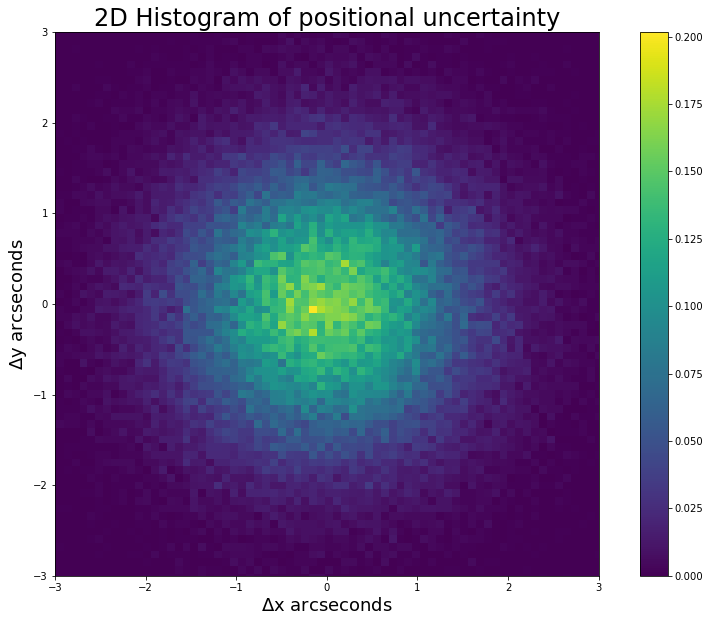

In [91]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

1) To have a '5-sigma' detection of movement, we are asking this question:
If there's no asteroid detected, and the no-detection background has a 2D-Gaussian distribution, for what observation do we expect a probability of 5-sigma (1 in 3.5 Million) of the data produces a signal as or more signal like?

2) The amplitude of an 2D Gaussian Distribution is a [Rayleigh Distribution](https://en.wikipedia.org/wiki/Normal_distribution#Combination_of_two_independent_random_variables)
So the question is:

$\int_{t}^{\infty} f(r) dr = 2.87x10^{-7} $, 
where f(r) is a Rayleigh distribution of scale 1: $f(r) = re^{\frac{-r^2}{2}}$, r is the radius from the origin $r = \sqrt{x^2 + y^2}$, t is the value we're looking for and 5$\sigma$ is about 3*10^(-7)

3)We find the distance corresponding to 5-sigma of the derived Rayleigh Distribution:

In [92]:
five_sigma = stats.norm.sf(5, loc=0., scale=1)
thresholdvalue = stats.rayleigh.isf(five_sigma, loc=0., scale=1.)
thresholdvalue

5.489079776062419

A distance of 5.49 arcseconds from the origin represent a 5-sigma detection of motion.

# Problem 3

1) We measure 6800 rays in an interval of 7200 minutes(15 nights x 8 hours/night x 60 minutes/hour), which is less than the average of 1 ray per minute. This was the effect of the moon's shadowing at night blocking some of the cosmic rays that we should have recieved.

So our question is:

If there's no signal, and the signal-free background has a Poisson distribution of average of 1 cosmic ray per minute, what's the significance of the moon blocking 400 or more cosmic rays (or measuring 6800 or less cosmic rays) over the peroid of 7200 minutes? (15 nights x 8 hours/night x 60 minutes/hour)

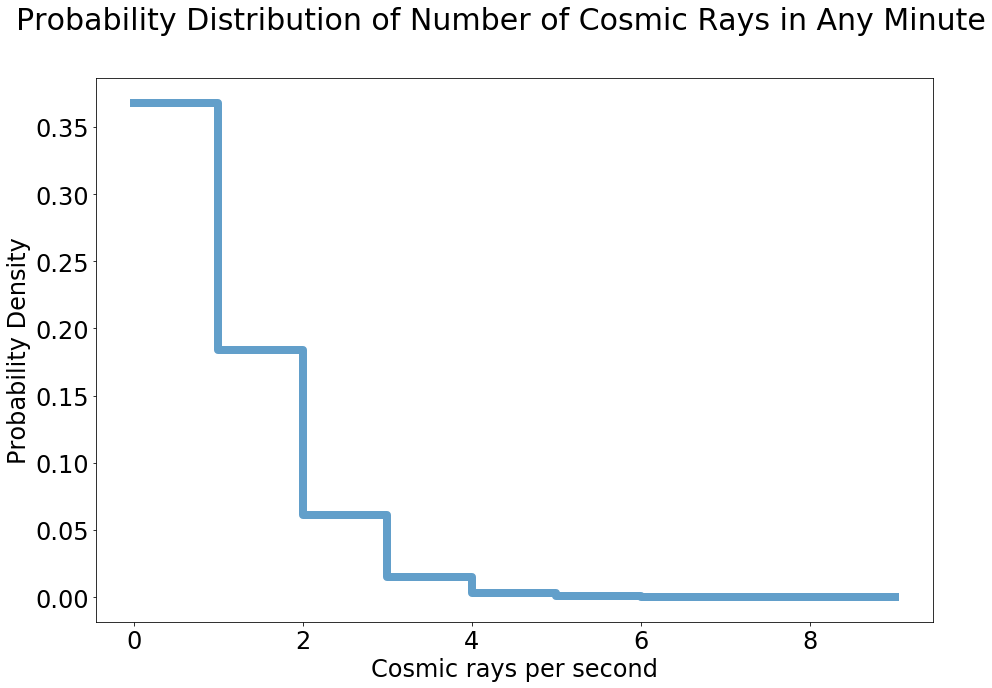

In [154]:
mu = 1
plt.tick_params(labelsize = 24)
x = np.arange(0,10)
y = np.zeros(len(x))
for i in np.arange(len(x)):
    y[i] = stats.poisson.pmf(x[i], mu, loc=0)
plt.suptitle('Probability Distribution of Number of Cosmic Rays in Any Minute', fontsize=30)
plt.xlabel('Cosmic rays per second', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.step(x, y, linewidth = 8,alpha = 0.7)

2) The sum of two or more Poisson distributions is a Poisson distribution with the shape parameter equal to the the sum of each original Poisson distribution's shape parameter.[Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables)

$\sum_{i=1}^{7200} f_{\mu_i} = f_{\mu_{total}}$, where $ \mu_{total} = \sum_{i=1}^{7200} \mu_i $

Since $\mu_1 = \mu_2 = ... =\mu_{7200} = 1$ (each minute has on average one cosmic ray appearing), $\mu_{total} = 7200$.

Thus, for the probability distribution over the 7200-minute interval, we shall plot a Possion distribution with the shape parameter equal to 7200 and located at 0.

Our mathematical question will be:

$\int_{-\infty}^{6800} f(x,7200) dx$, where $f(x, \mu)$ is the Poisson distribution $f(x, \mu) = e^{-\mu}\frac{\mu^x}{x!}$

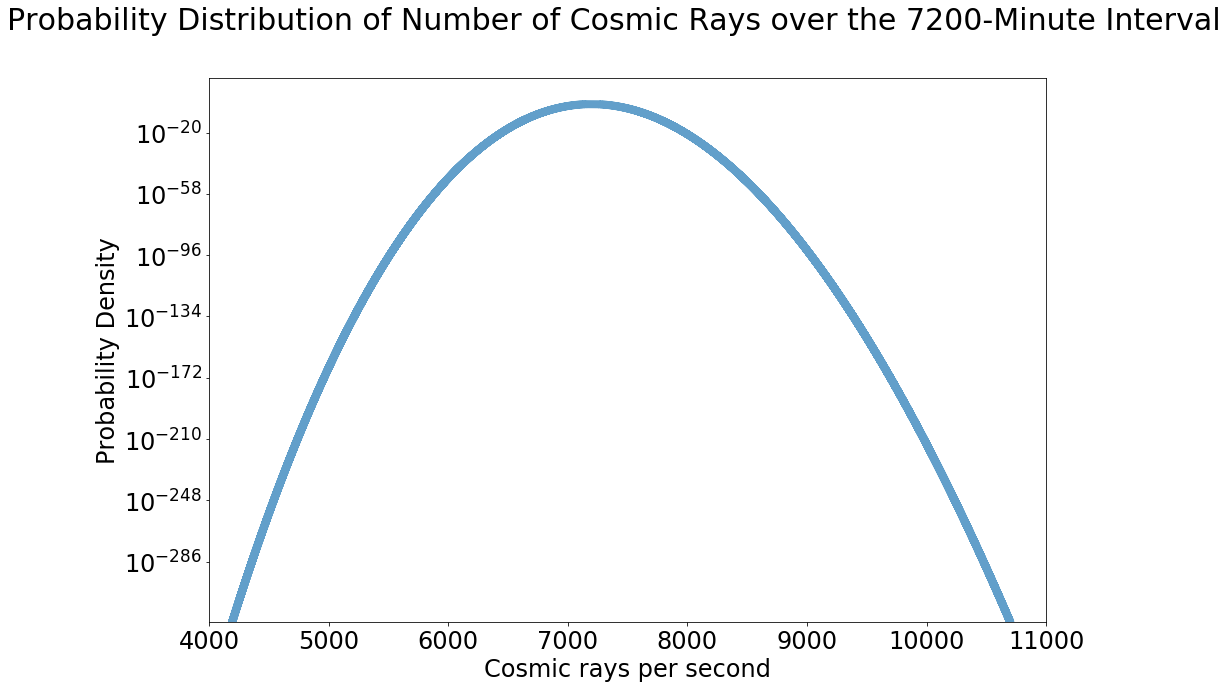

In [155]:
mu = 7200
plt.tick_params(labelsize = 24)
x = np.arange(0,12000)
y = np.zeros(len(x))
for i in np.arange(len(x)):
    y[i] = stats.poisson.pmf(x[i], mu, loc=0)
plt.suptitle('Probability Distribution of Number of Cosmic Rays over the 7200-Minute Interval', fontsize=30)
plt.xlabel('Cosmic rays per second', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.xlim(4000,11000)
plt.step(x, y, linewidth = 8,alpha = 0.7)

3)

We shall first find the probability that correspond to the observation value 6800.

Since this value is smaller than the average, we will find the probability by integrating from $-\infty$ up.

In [145]:
prob = stats.poisson.cdf(k=6800, mu=7200, loc=0)
prob

1.0133280183917768e-06

In [146]:
sigma_value = stats.norm.isf(prob, loc=0, scale=1)
sigma_value

4.750747965777188

The significance of our moon shadow detection has a sigma value of **4.75**.